In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
sber_data = pd.read_csv('data/sber_data.csv')
display(sber_data.head())
display(sber_data.tail())

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,mosque_count_1000,price_doc
0,1,43,27.0,4.0,Bibirevo,5001.0,5,11065.0,5,0,...,0.637189,0.947962,0.177975,0.625783,0.628187,14.053047,7.389498,good,0,5850000
1,2,34,19.0,3.0,Nagatinskij Zaton,3119.0,5,6237.0,8,0,...,0.688796,1.072315,0.273345,0.967821,0.471447,6.829889,0.709260,excellent,0,6000000
2,3,43,29.0,2.0,Tekstil'shhiki,1463.0,4,5580.0,7,0,...,1.543049,0.391957,0.158072,3.178751,0.755946,4.273200,3.156423,poor,0,5700000
3,4,89,50.0,9.0,Mitino,6839.0,9,17063.0,10,0,...,0.934273,0.892674,0.236455,1.031777,1.561505,16.990677,16.041521,good,0,13100000
4,5,77,77.0,4.0,Basmannoe,3240.0,7,7770.0,9,0,...,0.077901,0.810801,0.376838,0.378756,0.121681,1.112486,1.800125,excellent,0,16331452


,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,mosque_count_1000,price_doc
30466,30469,44,27.0,7.0,Otradnoe,5088.0,4,12721.0,4,0,...,1.103579,0.167718,0.349899,1.235066,0.612359,7.482165,4.836787,good,0,7400000
30467,30470,86,59.0,3.0,Tverskoe,1874.0,4,6772.0,4,1,...,0.069986,0.086552,0.362681,0.850385,0.310021,0.778428,1.450108,poor,0,25000000
30468,30471,45,NaN,10.0,Poselenie Vnukovskoe,NaN,0,NaN,0,0,...,4.338453,1.339078,1.234235,1.192543,1.186621,13.459593,9.890758,no data,0,6970959
30469,30472,64,32.0,5.0,Obruchevskoe,2372.0,6,6083.0,8,0,...,1.204798,1.340017,0.130667,1.644053,0.476021,2.088193,4.119706,satisfactory,0,13500000
30470,30473,43,28.0,1.0,Novogireevo,2215.0,4,5824.0,4,0,...,2.108265,0.825811,0.378950,0.480531,0.867332,0.688707,0.127867,poor,0,5600000


##### Задание 6.1 - Давайте немного модифицируем функцию outliers_iqr(data, feature). Добавьте в неё параметры left и right, которые задают число IQR влево и вправо от границ ящика (пусть по умолчанию они равны 1.5). Функция, как и раньше, должна возвращать потенциальные выбросы и очищенный DataFrame. Назовите измененную функцию: outliers_iqr_mod` Можете протестировать работу функции на DataFrame test_sber_data.csv.

In [9]:
# Введите свое решение ниже
import pandas as pd

def outliers_iqr_mod(data, feature, log_scale = False, left:float=1.5, right:float=1.5):
    if isinstance(data, str):
        data = pd.read_csv(data)
    if log_scale:
        x = np.log(data[feature])
    else:
        x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bond = quartile_1 - (iqr * left)
    upper_bond = quartile_3 + (iqr * right)
    outliers = data[(x < lower_bond) | (x > upper_bond)]
    cleaned = data[(x >= lower_bond) & (x <= upper_bond)]
    return outliers, cleaned



##### Задание 6.2 - Давайте ослабим границы метода Тьюки справа и усилим их влево. Примените модифицированную функцию outliers_iqr_mod() к признаку full_sq из таблицы sber_data данным с параметрами left=1 и right=6. Результаты работы поместите в переменные outliers и cleaned. Чему равно результирующее число выбросов в данных?

In [10]:
outliers, cleaned = outliers_iqr_mod(sber_data, 'full_sq', left=1, right=6)
display(f'Результирующее число записей: {cleaned.shape[0]}')
display(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')

'Результирующее число записей: 30412'

'Число выбросов по методу Тьюки: 59'

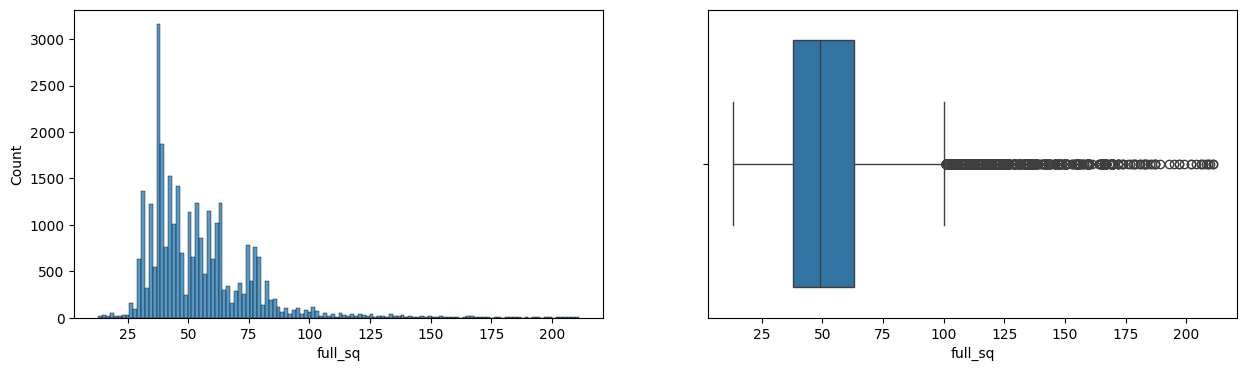

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,4))
histplot = sns.histplot(data=cleaned, x='full_sq', ax=axes[0] )
boxplot = sns.boxplot(data=cleaned, x='full_sq', ax=axes[1])

#### Задание 6.3 - Давайте расширим правило трёх сигм, чтобы иметь возможность учитывать особенности данных. Добавьте в функцию outliers_z_score(data, feature, log_scale=False) параметры left и right, которые будут задавать число сигм (стандартных отклонений) влево и вправо соответственно, определяющее границы метода z-отклонения. По умолчанию оба параметры равны 3. Результирующую функцию назовите outliers_z_score_mod(). Можете протестировать работу функции на DataFrame test_sber_data.csv. Проверять ваше решение мы будем, подавая на вход функции вместо data произвольный датафрейм.

In [12]:
def outliers_z_score_mod(data, feature, log_scale=False, left:float = 3, right:float = 3):
    if isinstance(data, str):
        data = pd.read_csv(data)
    if log_scale:
        x = np.log(data[feature] )
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - left * sigma
    upper_bound = mu + right * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned

In [13]:
outliers, cleaned = outliers_z_score_mod(sber_data, 'mkad_km', log_scale=True, left=3, right=3.5)
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу z-отклонения: 215
Результирующее число записей: 30256


#### Задание 6.5 - Постройте гистограмму для признака price_doc в логарифмическом масштабе. А также, добавьте на график линии, отображающие среднее и границы интервала для метода трех сигм. Выберите верные утверждения:

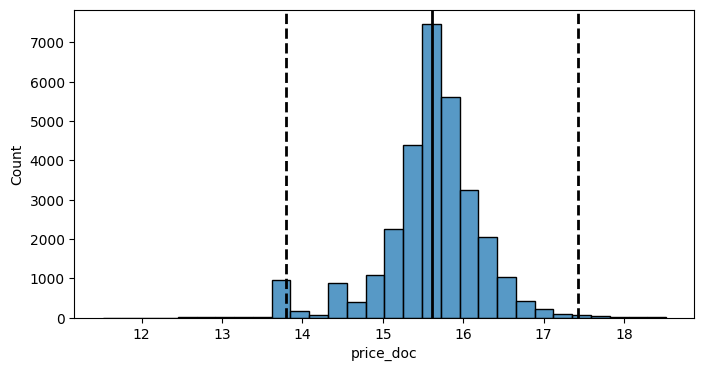

In [14]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(8,4))

log_price_doc = np.log(sber_data['price_doc'] + 1)
histplot = sns.histplot(log_price_doc, bins=30, ax=ax)
histplot.axvline(log_price_doc.mean(), color='k', lw=2)
histplot.axvline(log_price_doc.mean() - 3 * log_price_doc.std(), color='k', ls='--', lw=2)
histplot.axvline(log_price_doc.mean() + 3 * log_price_doc.std(), color='k', ls='--', lw=2)

#### Задание 6.6 - Найдите потенциальные выбросы по признаку price_doc с помощью метода z-отклонения. Используйте логарифмический масштаб распределения. Сделайте «послабление» на 0.7 сигм в обе стороны распределения. Сколько выбросов вы получили?

In [15]:
outliers, cleaned = outliers_z_score_mod(sber_data, 'price_doc', log_scale=True, left=3.7, right=3.7)
outliers.shape[0]

52

#### Задание 6.7 - Добавьте фишку с логарифмированием в свою функцию outliers_iqr_mod(). Добавьте в неё параметр log_scale. Если он выставлен в True, то производится логарифмирование признака. Примените полученную функцию к признаку price_doc. Число межквартильных размахов в обе стороны обозначьте как 3. Чему равно число выбросов, полученных таким методом?

In [16]:
outliers, cleaned = outliers_iqr_mod(sber_data, 'price_doc', log_scale=True, left=3, right=3)
outliers.shape[0]

92

## Закрепление знаний 

In [17]:
diabetes = pd.read_csv('data/diabetes_data.csv')
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Gender
0,6,98,58,33,190,34.0,0.430,43,0,Female
1,2,112,75,32,0,35.7,0.148,21,0,Female
2,2,108,64,0,0,30.8,0.158,21,0,Female
3,8,107,80,0,0,24.6,0.856,34,0,Female
4,7,136,90,0,0,29.9,0.210,50,0,Female
...,...,...,...,...,...,...,...,...,...,...
773,6,103,72,32,190,37.7,0.324,55,0,Female
774,1,71,48,18,76,20.4,0.323,22,0,Female
775,0,117,0,0,0,33.8,0.932,44,0,Female
776,4,154,72,29,126,31.3,0.338,37,0,Female


#### Задание 8.1 - Начнём с поиска дубликатов в данных. Найдите все повторяющиеся строки в данных и удалите их. Для поиска используйте все признаки в данных. Сколько записей осталось в данных?

In [18]:
dupl_columns = list(diabetes.columns)
mask = diabetes.duplicated(subset=dupl_columns)
dupl_data = diabetes[mask]
dupl_data.shape[0]

10

In [19]:
diabetes = diabetes.drop_duplicates(subset=dupl_columns)
diabetes.shape[0]

768

#### Задание 8.2 - Далее найдите все неинформативные признаки в данных и избавьтесь от них. В качестве порога информативности возьмите 0.95: удалите все признаки, для которых 95 % значений повторяются или 95 % записей уникальны. В ответ запишите имена признаков, которые вы нашли (без кавычек).

In [20]:
low_informations_col = []

for col in diabetes.columns:
    top_freq = diabetes[col].value_counts(normalize=True).max()
    nunique_ratio = diabetes[col].nunique() / diabetes[col].count()
    if top_freq > 0.95:
        low_informations_col.append(col)
    if nunique_ratio > 0.95:
        low_informations_col.append(col)
print(low_informations_col)  
diabetes = diabetes.drop(low_informations_col, axis=1)
diabetes.columns

['Gender']


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

#### Задание 8.3 - Замените все записи, равные 0, в столбцах Glucose, BloodPressure, SkinThickness, Insulin и BMI на символ пропуска. Его вы можете взять из библиотеки numpy: np.nan.

In [21]:
diabetes['Glucose'] = diabetes['Glucose'].apply(lambda x: np.nan if x == 0 else x)
diabetes['BloodPressure'] = diabetes['BloodPressure'].apply(lambda x: np.nan if x == 0 else x)
diabetes['SkinThickness'] = diabetes['SkinThickness'].apply(lambda x: np.nan if x == 0 else x)
diabetes['Insulin'] = diabetes['Insulin'].apply(lambda x: np.nan if x == 0 else x)
diabetes['BMI'] = diabetes['BMI'].apply(lambda x: np.nan if x == 0 else x)

In [27]:
diabetes['Insulin'].isnull().value_counts(normalize=True) 

Insulin
False    0.513021
True     0.486979
Name: proportion, dtype: float64

#### Задание 8.4 - Удалите из данных признаки, где число пропусков составляет более 30 %. Сколько признаков осталось в ваших данных (с учетом удаленных неинформативных признаков в задании 8.2)?

In [28]:
thresh = diabetes.shape[0] * 0.7
diabetes = diabetes.dropna(thresh=thresh, axis=1)
diabetes.shape[1]

8

#### Задание 8.5 - Удалите из данных только те строки, в которых содержится более двух пропусков одновременно. Чему равно результирующее число записей в таблице?

In [32]:
m = diabetes.shape[1]
diabetes = diabetes.dropna(thresh=m-2, axis=0)
diabetes.shape[0]

761

In [34]:
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,98.0,58.0,33.0,34.0,0.430,43,0
1,2,112.0,75.0,32.0,35.7,0.148,21,0
2,2,108.0,64.0,NaN,30.8,0.158,21,0
3,8,107.0,80.0,NaN,24.6,0.856,34,0
4,7,136.0,90.0,NaN,29.9,0.210,50,0
...,...,...,...,...,...,...,...,...
763,5,139.0,64.0,35.0,28.6,0.411,26,0
764,1,96.0,122.0,NaN,22.4,0.207,27,0
765,10,101.0,86.0,37.0,45.6,1.136,38,1
766,0,141.0,NaN,NaN,42.4,0.205,29,1


#### Задание 8.6 - В оставшихся записях замените пропуски на медиану. Чему равно среднее значение в столбце SkinThickness? Ответ округлите до десятых.

In [38]:
values = {
    'Pregnancies': diabetes['Pregnancies'].median(),
    'Glucose': diabetes['Glucose'].median(),
    'BloodPressure': diabetes['BloodPressure'].median(),
    'SkinThickness': diabetes['SkinThickness'].median(),
    'BMI': diabetes['BMI'].median(),
    'DiabetesPedigreeFunction': diabetes['DiabetesPedigreeFunction'].median(),
    'Age': diabetes['Age'].median(),
    'Outcome': diabetes['Outcome'].median()
}

diabetes = diabetes.fillna(values)

In [40]:
diabetes['SkinThickness'].mean()

np.float64(29.109067017082786)

#### Задание 8.7 - Сколько выбросов найдёт классический метод межквартильного размаха в признаке **SkinThickness**?

In [41]:
def classic_iqr(data, feature):
    x = data[feature]
    quartile1, quartile3 = x.quantile(0.25), x.quantile(0.75)
    iqr = quartile3 - quartile1
    lower_bound = quartile1 - (iqr * 1.5)
    upper_bound = quartile3 + (iqr * 1.5)
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned

In [42]:
outliers, cleaned = classic_iqr(diabetes, 'SkinThickness')
outliers.shape[0]

87

#### Задание 8.8 - Сколько выбросов найдёт классический метод z-отклонения в признаке SkinThickness?

In [44]:
diabetes[diabetes['SkinThickness'] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome


In [45]:
def classic_z_method(data, feature):
    x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - (sigma * 3)
    upper_bound = mu + (sigma * 3)
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned


In [46]:
outliers, cleaned = classic_z_method(diabetes, 'SkinThickness')
outliers.shape[0]

4

#### Задание 8.9 - На приведённой гистограмме показано распределение признака DiabetesPedigreeFunction. Такой вид распределения очень похож на логнормальный, и он заставляет задуматься о логарифмировании признака. Найдите сначала число выбросов в признаке DiabetesPedigreeFunction с помощью классического метода межквартильного размаха.

In [48]:
outliers_classic, cleaned_classic = outliers_iqr_mod(diabetes, 'DiabetesPedigreeFunction')
outliers_log, cleaned_log = outliers_iqr_mod(diabetes, 'DiabetesPedigreeFunction', log_scale=True)
outliers_classic.shape[0] - outliers_log.shape[0]

29